In [1]:
!git clone https://github.com/PhonePe/pulse.git # cloning the phonepe pulse repository for data extract

Cloning into 'pulse'...
remote: Enumerating objects: 17904, done.
remote: Counting objects: 100% (49/49), done.
remote: Compressing objects: 100% (32/32), done.
remote: Total 17904 (delta 19), reused 17 (delta 17), pack-reused 17855 (from 2)
Receiving objects: 100% (17904/17904), 26.13 MiB | 17.20 MiB/s, done.
Resolving deltas: 100% (8723/8723), done.
Updating files: 100% (9029/9029), done.


In [2]:
import pandas as pd # to store / change data
import json # in format of json file
import os # to get / interact with file
path="/content/pulse/data/aggregated/transaction/country/india/state/" # root path for agg_transaction
Agg_state_list=os.listdir(path) # All state list
Agg_trans_data={'State':[], 'Year':[],'Quarter':[],'Transaction_type':[], 'Transaction_count':[], 'Transaction_amount':[]}

for state_name in Agg_state_list: # state list
    state_path=path+state_name+"/"
    Agg_yr=os.listdir(state_path)
    for year in Agg_yr: #year list
        year_path=state_path+year+"/"
        Agg_yr_list=os.listdir(year_path)
        for quarter in Agg_yr_list: # quarter list
            quarter_path=year_path+quarter
            Data=open(quarter_path,'r')
            D=json.load(Data)
            for z in D['data']['transactionData']: # data extraction
              Name=z['name']
              count=z['paymentInstruments'][0]['count']
              amount=z['paymentInstruments'][0]['amount']
              Agg_trans_data['Transaction_type'].append(Name) # appending data in dictionary
              Agg_trans_data['Transaction_count'].append(count)
              Agg_trans_data['Transaction_amount'].append(amount)
              Agg_trans_data['State'].append(state_name)
              Agg_trans_data['Year'].append(year)
              Agg_trans_data['Quarter'].append(int(quarter.strip('.json')))

Agg_Trans_df=pd.DataFrame(Agg_trans_data) # converting dictionary to dataframe

In [3]:
Agg_Trans_df.head(10)

,State,Year,Quarter,Transaction_type,Transaction_count,Transaction_amount
0,west-bengal,2024,2,Merchant payments,505063040,3.129978e+11
1,west-bengal,2024,2,Peer-to-peer payments,393935166,1.182044e+12
2,west-bengal,2024,2,Recharge & bill payments,80431842,5.118639e+10
3,west-bengal,2024,2,Financial Services,545945,6.830567e+08
4,west-bengal,2024,2,Others,504714,4.324746e+08
5,west-bengal,2024,3,Merchant payments,568524147,3.418104e+11
6,west-bengal,2024,3,Peer-to-peer payments,436521674,1.208751e+12
7,west-bengal,2024,3,Recharge & bill payments,78735491,5.579799e+10
8,west-bengal,2024,3,Financial Services,690027,8.163805e+08
9,west-bengal,2024,3,Others,445106,4.684206e+08


In [4]:
import pandas as pd
import json
import os
path="/content/pulse/data/aggregated/user/country/india/state/"
Agg_state_list=os.listdir(path)
Agg_user_data={'State':[], 'Year':[],'Quarter':[],'user_brand':[], 'user_count':[], 'user_percentage':[]}

for state_name in Agg_state_list:
    state_path = path + state_name + "/"
    Agg_yr = os.listdir(state_path)
    for year in Agg_yr:
        year_path = state_path + year + "/"
        Agg_yr_list = os.listdir(year_path)
        for quarter in Agg_yr_list:
            quarter_path = year_path + quarter
            Data = open(quarter_path, 'r')
            D = json.load(Data)
            if D['data']['usersByDevice']:
                for z in D['data']['usersByDevice']:
                    brand = z['brand']
                    count = z['count']
                    percentage = z['percentage']
                    Agg_user_data['user_brand'].append(brand)
                    Agg_user_data['user_count'].append(count)
                    Agg_user_data['user_percentage'].append(percentage)
                    Agg_user_data['State'].append(state_name)
                    Agg_user_data['Year'].append(year)
                    Agg_user_data['Quarter'].append(int(quarter.strip('.json')))
Agg_user_df=pd.DataFrame(Agg_user_data)

In [5]:
Agg_user_df.head(10)

,State,Year,Quarter,user_brand,user_count,user_percentage
0,west-bengal,2021,2,Xiaomi,4654760,0.258886
1,west-bengal,2021,2,Samsung,3778434,0.210147
2,west-bengal,2021,2,Vivo,2703412,0.150357
3,west-bengal,2021,2,Oppo,1970103,0.109572
4,west-bengal,2021,2,Realme,1419072,0.078925
5,west-bengal,2021,2,Motorola,402767,0.022401
6,west-bengal,2021,2,Lenovo,350841,0.019513
7,west-bengal,2021,2,Asus,297579,0.016551
8,west-bengal,2021,2,Huawei,272965,0.015182
9,west-bengal,2021,2,Apple,201393,0.011201


In [6]:
import os
import json
import pandas as pd
path="/content/pulse/data/aggregated/insurance/country/india/state/"
Agg_ins_list=os.listdir(path)
Agg_ins_data={'State':[], 'Year':[],'Quarter':[],'Transaction_type':[], 'Transaction_count':[], 'Transaction_amount':[]}
for state_name in Agg_ins_list:
    state_path=path+state_name+"/"
    Agg_yr=os.listdir(state_path)
    for year in Agg_yr:
        year_path=state_path+year+"/"
        Agg_yr_list=os.listdir(year_path)
        for quarter in Agg_yr_list:
            quarter_path=year_path+quarter
            Data=open(quarter_path,'r')
            D=json.load(Data)
            for z in D['data']['transactionData']:
              Name=z['name']
              count=z['paymentInstruments'][0]['count']
              amount=z['paymentInstruments'][0]['amount']
              Agg_ins_data['Transaction_type'].append(Name)
              Agg_ins_data['Transaction_count'].append(count)
              Agg_ins_data['Transaction_amount'].append(amount)
              Agg_ins_data['State'].append(state_name)
              Agg_ins_data['Year'].append(year)
              Agg_ins_data['Quarter'].append(int(quarter.strip('.json')))


Agg_ins_df=pd.DataFrame(Agg_ins_data)

In [7]:
Agg_ins_df.head(10)

,State,Year,Quarter,Transaction_type,Transaction_count,Transaction_amount
0,west-bengal,2024,2,Insurance,67048,89476633.0
1,west-bengal,2024,3,Insurance,77158,107451766.0
2,west-bengal,2024,1,Insurance,79576,104987909.0
3,west-bengal,2024,4,Insurance,91719,120602777.0
4,west-bengal,2023,2,Insurance,49792,65204280.0
5,west-bengal,2023,3,Insurance,58131,76359312.0
6,west-bengal,2023,1,Insurance,56833,77461732.0
7,west-bengal,2023,4,Insurance,72712,100365562.0
8,west-bengal,2021,2,Insurance,15200,12396029.0
9,west-bengal,2021,3,Insurance,24839,21424337.0


In [8]:
import os
import json
import pandas as pd
path="/content/pulse/data/map/insurance/hover/country/india/state/"
Map_ins_list=os.listdir(path)
Map_ins_data={'State': [],'Year': [],'Quarter': [],'District': [],'Insurance_Count': [],'Insurance_Amount': []}
for state_name in Map_ins_list:
    state_path = path + state_name + "/"
    Map_yr = os.listdir(state_path)
    for year in Map_yr:
        year_path = state_path + year + "/"
        Map_yr_list = os.listdir(year_path)
        for quarter in Map_yr_list:
            quarter_path = year_path + quarter
            Data = open(quarter_path, 'r')
            D = json.load(Data)
            for z in D['data']['hoverDataList']:
                district = z['name']
                count = z['metric'][0]['count']
                amount = z['metric'][0]['amount']
                Map_ins_data['District'].append(district)
                Map_ins_data['Insurance_Count'].append(count)
                Map_ins_data['Insurance_Amount'].append(amount)
                Map_ins_data['State'].append(state_name)
                Map_ins_data['Year'].append(year)
                Map_ins_data['Quarter'].append(int(quarter.strip('.json')))
Map_ins_df = pd.DataFrame(Map_ins_data)


In [9]:
Map_ins_df.head(10)

,State,Year,Quarter,District,Insurance_Count,Insurance_Amount
0,west-bengal,2024,2,south twenty four parganas district,4829,6149543.0
1,west-bengal,2024,2,purba bardhaman district,2444,3145451.0
2,west-bengal,2024,2,uttar dinajpur district,1213,1502443.0
3,west-bengal,2024,2,kalimpong district,110,213710.0
4,west-bengal,2024,2,murshidabad district,2432,2861635.0
5,west-bengal,2024,2,paschim medinipur district,2793,3494506.0
6,west-bengal,2024,2,dakshin dinajpur district,594,628802.0
7,west-bengal,2024,2,jalpaiguri district,1308,1908036.0
8,west-bengal,2024,2,purulia district,879,1226449.0
9,west-bengal,2024,2,north twenty four parganas district,12366,17517949.0


In [10]:
import os
import json
import pandas as pd
path="/content/pulse/data/map/transaction/hover/country/india/state/"
Map_trans_list=os.listdir(path)
Map_trans_data={'State': [],'Year': [],'Quarter': [],'District': [],'Transaction_Count': [],'Transaction_Amount': []}
for state_name in Map_trans_list:
    state_path = path + state_name + "/"
    Map_yr = os.listdir(state_path)
    for year in Map_yr:
        year_path = state_path + year + "/"
        Map_yr_list = os.listdir(year_path)
        for quarter in Map_yr_list:
            quarter_path = year_path + quarter
            Data = open(quarter_path, 'r')
            D = json.load(Data)
            for z in D['data']['hoverDataList']:
                district = z['name']
                count = z['metric'][0]['count']
                amount = z['metric'][0]['amount']
                Map_trans_data['District'].append(district)
                Map_trans_data['Transaction_Count'].append(count)
                Map_trans_data['Transaction_Amount'].append(amount)
                Map_trans_data['State'].append(state_name)
                Map_trans_data['Year'].append(year)
                Map_trans_data['Quarter'].append(int(quarter.strip('.json')))
Map_trans_df = pd.DataFrame(Map_trans_data)





In [11]:
Map_trans_df.head(10)

,State,Year,Quarter,District,Transaction_Count,Transaction_Amount
0,west-bengal,2024,2,south twenty four parganas district,61589198,1.054369e+11
1,west-bengal,2024,2,purba bardhaman district,34313558,5.868506e+10
2,west-bengal,2024,2,uttar dinajpur district,31010590,5.260276e+10
3,west-bengal,2024,2,kalimpong district,1402263,2.142589e+09
4,west-bengal,2024,2,murshidabad district,77009854,1.453550e+11
5,west-bengal,2024,2,paschim medinipur district,47935332,7.566704e+10
6,west-bengal,2024,2,dakshin dinajpur district,10295631,1.779541e+10
7,west-bengal,2024,2,jalpaiguri district,16459301,2.372465e+10
8,west-bengal,2024,2,purulia district,20587669,2.251648e+10
9,west-bengal,2024,2,north twenty four parganas district,158661426,2.191272e+11


In [12]:
import os
import json
import pandas as pd
path="/content/pulse/data/map/user/hover/country/india/state/"
Map_user_list=os.listdir(path)
Map_user_data={'State': [],'Year': [],'Quarter': [],'District': [],'Registered_User': [],'App_Opens': []}
for state_name in Map_user_list:
    state_path = path + state_name + "/"
    Map_yr = os.listdir(state_path)
    for year in Map_yr:
        year_path = state_path + year + "/"
        Map_yr_list = os.listdir(year_path)
        for quarter in Map_yr_list:
            quarter_path = year_path + quarter
            Data = open(quarter_path, 'r')
            D = json.load(Data)
            if D.get("data") and D["data"].get("hoverData"):
              for district_name, data in D['data']['hoverData'].items():
                district = district_name
                registered_users = data['registeredUsers']
                app_opens = data['appOpens']
                Map_user_data['District'].append(district)
                Map_user_data['Registered_User'].append(registered_users)
                Map_user_data['App_Opens'].append(app_opens)
                Map_user_data['State'].append(state_name)
                Map_user_data['Year'].append(year)
                Map_user_data['Quarter'].append(int(quarter.strip('.json')))

Map_user_df = pd.DataFrame(Map_user_data)


In [13]:
Map_user_df.head(10)

,State,Year,Quarter,District,Registered_User,App_Opens
0,west-bengal,2024,2,south twenty four parganas district,2333257,48907886
1,west-bengal,2024,2,purba bardhaman district,1432719,27344799
2,west-bengal,2024,2,uttar dinajpur district,745909,30106105
3,west-bengal,2024,2,kalimpong district,68216,10811201
4,west-bengal,2024,2,murshidabad district,2271497,39476726
5,west-bengal,2024,2,paschim medinipur district,1558562,62087954
6,west-bengal,2024,2,dakshin dinajpur district,532683,16791897
7,west-bengal,2024,2,jalpaiguri district,480852,55232843
8,west-bengal,2024,2,purulia district,806146,57228135
9,west-bengal,2024,2,north twenty four parganas district,4746814,24068556


In [14]:
import os
import pandas as pd
import json
path="/content/pulse/data/top/insurance/country/india/state/"
Top_ins_list=os.listdir(path)
Top_ins_data={'State':[],'Year':[],'Quarter':[],'District':[] , 'Insurance_Count':[],'Insurance_Amount':[]}
for state_name in Top_ins_list:
    state_path=path+state_name+"/"
    Top_yr=os.listdir(state_path)
    for year in Top_yr:
        year_path=state_path+year+"/"
        Top_yr_list=os.listdir(year_path)
        for quarter in Top_yr_list:
            quarter_path=year_path+quarter
            Data=open(quarter_path,'r')
            D=json.load(Data)
            for z in D['data']['districts']:
                district=z
                count=z['metric']['count']
                amount=z['metric']['amount']
                Top_ins_data['District'].append(z['entityName'])
                Top_ins_data['Insurance_Count'].append(z['metric']['count'])
                Top_ins_data['Insurance_Amount'].append(z['metric']['amount'])
                Top_ins_data['State'].append(state_name)
                Top_ins_data['Year'].append(year)
                Top_ins_data['Quarter'].append(int(quarter.strip('.json')))
Top_ins_df=pd.DataFrame(Top_ins_data)


In [15]:
Top_ins_df.head(10)

,State,Year,Quarter,District,Insurance_Count,Insurance_Amount
0,west-bengal,2024,2,north twenty four parganas,12366,17517949.0
1,west-bengal,2024,2,kolkata,10517,14115515.0
2,west-bengal,2024,2,south twenty four parganas,4829,6149543.0
3,west-bengal,2024,2,howrah,4523,5947418.0
4,west-bengal,2024,2,paschim bardhaman,3790,5535438.0
5,west-bengal,2024,2,hooghly,3758,4785509.0
6,west-bengal,2024,2,paschim medinipur,2793,3494506.0
7,west-bengal,2024,2,darjiling,2758,4207151.0
8,west-bengal,2024,2,nadia,2758,3589423.0
9,west-bengal,2024,2,maldah,2731,3446842.0


In [16]:
import os
import json
import pandas as pd
path="/content/pulse/data/top/transaction/country/india/state/"
Top_trans_list=os.listdir(path)
Top_trans_data={'State':[],'Year':[],'Quarter':[],'District':[], 'Transaction_Count':[],'Transaction_Amount':[]}
for state_name in Top_trans_list:
    state_path=path+state_name+"/"
    Top_yr=os.listdir(state_path)
    for year in Top_yr:
        year_path=state_path+year+"/"
        Top_yr_list=os.listdir(year_path)
        for quarter in Top_yr_list:
            quarter_path=year_path+quarter
            Data=open(quarter_path,'r')
            D=json.load(Data)
            for z in D['data']['districts']:
                district=z
                count=z['metric']['count']
                amount=z['metric']['amount']
                Top_trans_data['District'].append(z['entityName'])
                Top_trans_data['Transaction_Count'].append(z['metric']['count'])
                Top_trans_data['Transaction_Amount'].append(z['metric']['amount'])
                Top_trans_data['State'].append(state_name)
                Top_trans_data['Year'].append(year)
                Top_trans_data['Quarter'].append(int(quarter.strip('.json')))
Top_trans_df=pd.DataFrame(Top_trans_data)


In [17]:
Top_trans_df.head(10)

,State,Year,Quarter,District,Transaction_Count,Transaction_Amount
0,west-bengal,2024,2,north twenty four parganas,158661426,2.191272e+11
1,west-bengal,2024,2,kolkata,104070161,1.541606e+11
2,west-bengal,2024,2,murshidabad,77009854,1.453550e+11
3,west-bengal,2024,2,south twenty four parganas,61589198,1.054369e+11
4,west-bengal,2024,2,purba medinipur,55342585,9.889789e+10
5,west-bengal,2024,2,maldah,52271735,9.043206e+10
6,west-bengal,2024,2,nadia,49543213,8.588943e+10
7,west-bengal,2024,2,howrah,48742679,7.969588e+10
8,west-bengal,2024,2,paschim medinipur,47935332,7.566704e+10
9,west-bengal,2024,2,hooghly,47725642,7.728579e+10


In [18]:
import os
import json
import pandas as pd
path="/content/pulse/data/top/user/country/india/state/"
Top_user_list=os.listdir(path)
Top_user_data={'State':[], 'Year':[],'Quarter':[],'District':[],'Registered_User':[]}
for state_name in Top_user_list:
    state_path=path+state_name+"/"
    Top_yr=os.listdir(state_path)
    for year in Top_yr:
        year_path=state_path+year+"/"
        Top_yr_list=os.listdir(year_path)
        for quarter in Top_yr_list:
            quarter_path=year_path+quarter
            Data=open(quarter_path,'r')
            D=json.load(Data)
            for z in D['data']['districts']:
                district=z
                count=z['registeredUsers']
                Top_user_data['District'].append(z['name'])
                Top_user_data['Registered_User'].append(count)
                Top_user_data['State'].append(state_name)
                Top_user_data['Year'].append(year)
                Top_user_data['Quarter'].append(int(quarter.strip('.json')))
Top_user_df=pd.DataFrame(Top_user_data)

In [19]:
Top_user_df.head(10)

,State,Year,Quarter,District,Registered_User
0,west-bengal,2024,2,north twenty four parganas,4746814
1,west-bengal,2024,2,kolkata,3404100
2,west-bengal,2024,2,south twenty four parganas,2333257
3,west-bengal,2024,2,murshidabad,2271497
4,west-bengal,2024,2,hooghly,2007748
5,west-bengal,2024,2,howrah,1807232
6,west-bengal,2024,2,nadia,1737326
7,west-bengal,2024,2,purba medinipur,1721598
8,west-bengal,2024,2,paschim medinipur,1558562
9,west-bengal,2024,2,purba bardhaman,1432719


In [20]:
import sqlite3
conn = sqlite3.connect('phonepe.db')
cursor = conn.cursor()

In [21]:
cursor.execute(
    '''
    CREATE TABLE aggregated_insurance (
        id INTEGER PRIMARY KEY AUTOINCREMENT,
        state TEXT NOT NULL,
        year INTEGER NOT NULL,
        quarter INTEGER NOT NULL,
        transaction_type TEXT NOT NULL,
        transaction_count INTEGER,
        transaction_amount REAL
    );
''')

conn.commit()



In [22]:
cursor.execute('''
    CREATE TABLE aggregated_transactions (
        id INTEGER PRIMARY KEY AUTOINCREMENT,
        state TEXT NOT NULL,
        year INTEGER NOT NULL,
        quarter INTEGER NOT NULL,
        transaction_type TEXT NOT NULL,
        transaction_count INTEGER,
        transaction_amount REAL
    );
''')

conn.commit()

In [23]:
cursor.execute('''
    CREATE TABLE aggregated_users (
        id INTEGER PRIMARY KEY AUTOINCREMENT,
        state TEXT NOT NULL,
        year INTEGER NOT NULL,
        quarter INTEGER NOT NULL,
        user_brand TEXT NOT NULL,
        user_count INTEGER,
        user_percentage REAL
    );
''')

conn.commit()


In [24]:
cursor.execute('''
 CREATE TABLE map_insurance (
        id INTEGER PRIMARY KEY AUTOINCREMENT,
        state TEXT NOT NULL,
        year INTEGER NOT NULL,
        quarter INTEGER NOT NULL,
        district TEXT NOT NULL,
        insurance_count INTEGER,
        insurance_amount REAL
    );
''')

conn.commit()

In [25]:
cursor.execute('''
    CREATE TABLE map_transactions (
        id INTEGER PRIMARY KEY AUTOINCREMENT,
        state TEXT NOT NULL,
        year INTEGER NOT NULL,
        quarter INTEGER NOT NULL,
        district TEXT NOT NULL,
        transaction_count INTEGER,
        transaction_amount REAL
        );
''')

conn.commit()


In [26]:
cursor.execute('''
    CREATE TABLE map_users (
        id INTEGER PRIMARY KEY AUTOINCREMENT,
        state TEXT NOT NULL,
        year INTEGER NOT NULL,
        quarter INTEGER NOT NULL,
        district TEXT NOT NULL,
        registered_user INTEGER,
        app_opens REAL
    );
''')

conn.commit()

In [27]:
cursor.execute("DROP TABLE IF EXISTS top_insurance")
cursor.execute('''
    CREATE TABLE top_insurance (
        id INTEGER PRIMARY KEY AUTOINCREMENT,
        state TEXT NOT NULL,
        year INTEGER NOT NULL,
        quarter INTEGER NOT NULL,
        district TEXT NOT NULL,
        insurance_count INTEGER,
        insurance_amount REAL
    );
''')

conn.commit()


In [28]:
cursor.execute("DROP TABLE IF EXISTS top_transactions")
cursor.execute('''
    CREATE TABLE top_transactions (
        id INTEGER PRIMARY KEY AUTOINCREMENT,
        state TEXT NOT NULL,
        year INTEGER NOT NULL,
        quarter INTEGER NOT NULL,
        district TEXT NOT NULL,
        transaction_count INTEGER,
        transaction_amount REAL
    );
''')

conn.commit()


In [29]:
cursor.execute("DROP TABLE IF EXISTS top_users")
cursor.execute('''
    CREATE TABLE top_users (
        id INTEGER PRIMARY KEY AUTOINCREMENT,
        state TEXT NOT NULL,
        year INTEGER NOT NULL,
        quarter INTEGER NOT NULL,
        district TEXT NOT NULL,
        registered_user INTEGER
    );
''')

conn.commit()



In [30]:
Agg_ins_df.to_sql('aggregated_insurance', conn, if_exists='append', index=False)

682

In [31]:
Agg_user_df.to_sql('aggregated_users', conn, if_exists='append', index=False)

6732

In [32]:
Agg_Trans_df.to_sql('aggregated_transactions', conn, if_exists='append', index=False)

5034

In [33]:
Map_ins_df.to_sql('map_insurance', conn, if_exists='append', index=False)

13876

In [34]:
Map_trans_df.to_sql('map_transactions', conn, if_exists='append', index=False)

20604

In [35]:
import json

for col in Map_user_df.columns:
    if Map_user_df[col].apply(lambda x: isinstance(x, dict)).any():
        Map_user_df[col] = Map_user_df[col].apply(lambda x: json.dumps(x) if isinstance(x, dict) else x)


In [36]:
Map_user_df.to_sql('map_users', conn, if_exists='append', index=False)

20608

In [37]:
import json

for col in Top_ins_df.columns:
    if Top_ins_df[col].apply(lambda x: isinstance(x, dict)).any():
        Top_ins_df[col] = Top_ins_df[col].apply(lambda x: json.dumps(x) if isinstance(x, dict) else x)


In [38]:
Top_ins_df.to_sql('top_insurance', conn, if_exists='append', index=False)

5608

In [39]:
import json

for col in Top_trans_df.columns:
    if Top_trans_df[col].apply(lambda x: isinstance(x, dict)).any():
        Top_trans_df[col] = Top_trans_df[col].apply(lambda x: json.dumps(x) if isinstance(x, dict) else x)

In [40]:
Top_trans_df.to_sql('top_transactions', conn, if_exists='append', index=False)

8296

In [41]:
import json

for col in Top_user_df.columns:
    if Top_user_df[col].apply(lambda x: isinstance(x, dict)).any():
        Top_user_df[col] = Top_user_df[col].apply(lambda x: json.dumps(x) if isinstance(x, dict) else x)

In [43]:
Top_user_df.to_sql('top_users', conn, if_exists='append', index=False)

8296

In [42]:
df = pd.read_sql_query("SELECT * FROM aggregated_transactions LIMIT 5;", conn)
df

,id,state,year,quarter,transaction_type,transaction_count,transaction_amount
0,1,west-bengal,2024,2,Merchant payments,505063040,3.129978e+11
1,2,west-bengal,2024,2,Peer-to-peer payments,393935166,1.182044e+12
2,3,west-bengal,2024,2,Recharge & bill payments,80431842,5.118639e+10
3,4,west-bengal,2024,2,Financial Services,545945,6.830567e+08
4,5,west-bengal,2024,2,Others,504714,4.324746e+08


## **1.Case Study  Decoding Transaction Dynamics on PhonePe :**

In [44]:
# Top States by Transaction Amount
import sqlite3
import pandas as pd
conn = sqlite3.connect('/content/phonepe.db')
query = """
SELECT State, SUM(transaction_amount) AS Total_Amount
FROM aggregated_transactions
GROUP BY State
ORDER BY Total_Amount DESC
LIMIT 10;
"""
top_states = pd.read_sql_query(query, conn)
top_states.head()


,state,Total_Amount
0,telangana,4.165596e+13
1,karnataka,4.067872e+13
2,maharashtra,4.037420e+13
3,andhra-pradesh,3.466908e+13
4,uttar-pradesh,2.688521e+13


In [45]:
# Quarterly Growth by State
query = """
SELECT State, Year, Quarter, SUM(transaction_amount) AS Total_Amount
FROM aggregated_transactions
GROUP BY State, Year, Quarter
ORDER BY State, Year, Quarter;
"""
quarterly_growth = pd.read_sql_query(query, conn)
quarterly_growth.head()


,state,year,quarter,Total_Amount
0,andaman-&-nicobar-islands,2018,1,1.463176e+07
1,andaman-&-nicobar-islands,2018,2,2.833854e+07
2,andaman-&-nicobar-islands,2018,3,5.555747e+07
3,andaman-&-nicobar-islands,2018,4,9.054834e+07
4,andaman-&-nicobar-islands,2019,1,1.022997e+08


In [46]:
# Transaction Trends by Type
query = """
SELECT Transaction_type, Year, Quarter, SUM(transaction_count) AS Total_Transactions, SUM(transaction_amount) AS Total_Amount
FROM aggregated_transactions
GROUP BY Transaction_type, Year, Quarter
ORDER BY Transaction_type, Year, Quarter;
"""
txn_trends = pd.read_sql_query(query, conn)
txn_trends.head()

,transaction_type,year,quarter,Total_Transactions,Total_Amount
0,Financial Services,2018,1,3762820,8.158531e+08
1,Financial Services,2018,2,5186567,1.176991e+09
2,Financial Services,2018,3,6218593,8.914478e+08
3,Financial Services,2018,4,5216165,8.685846e+08
4,Financial Services,2019,1,4627351,6.038519e+08


In [47]:
# States with Declining Transactions in Latest Quarter
query = """
SELECT State, Year, Quarter, SUM(transaction_count) AS Total_Transactions
FROM aggregated_transactions
WHERE Year = 2023 AND (Quarter = '1' OR Quarter = '4')
GROUP BY State, Year, Quarter
ORDER BY State, Year, Quarter;
"""
latest_quarters = pd.read_sql_query(query, conn)
latest_quarters.head()

,state,year,quarter,Total_Transactions
0,andaman-&-nicobar-islands,2023,1,2276392
1,andaman-&-nicobar-islands,2023,4,3695783
2,andhra-pradesh,2023,1,1145532464
3,andhra-pradesh,2023,4,1596987426
4,arunachal-pradesh,2023,1,8042825


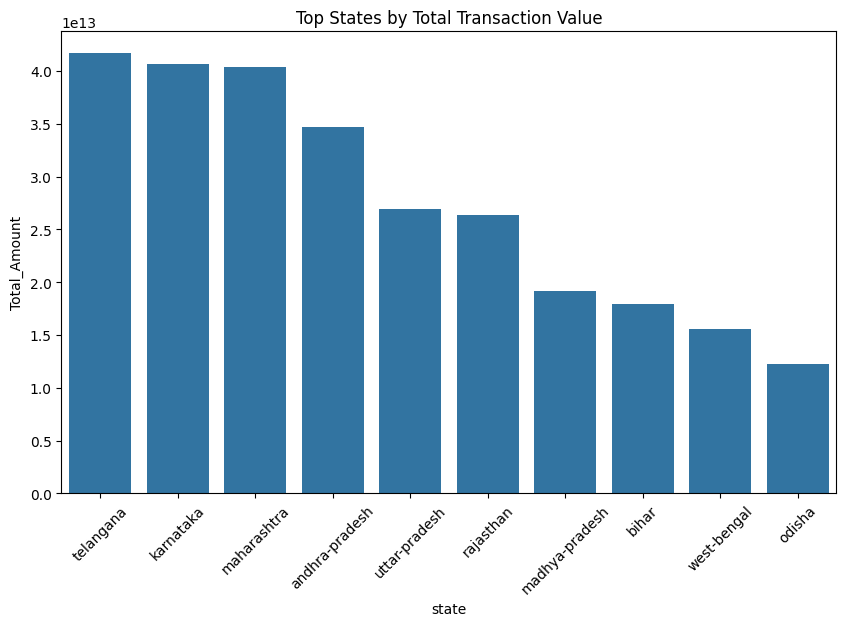

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.barplot(data=top_states, x='state', y='Total_Amount')
plt.xticks(rotation=45)
plt.title('Top States by Total Transaction Value')
plt.show()

# **2.Insurance Penetration and Growth Potential Analysis**

In [49]:
# Total Insurance Transactions by State (All-Time)
query = """
SELECT State, SUM(Transaction_count) AS Total_Transactions,
       SUM(Transaction_amount) AS Total_Amount
FROM aggregated_insurance
GROUP BY State
ORDER BY Total_Transactions DESC;
"""

insurance_by_state = pd.read_sql_query(query, conn)
insurance_by_state.head()


,state,Total_Transactions,Total_Amount
0,karnataka,1957404,2.743155e+09
1,maharashtra,1815539,2.363129e+09
2,tamil-nadu,1215269,1.555507e+09
3,uttar-pradesh,1139153,1.740346e+09
4,telangana,894342,1.171060e+09


In [50]:
# Insurance Growth by Quarter per State
query = """
SELECT state, Year, Quarter, SUM(Transaction_count) AS Total_Transactions
FROM aggregated_insurance
GROUP BY state, Year, Quarter
ORDER BY state, Year, Quarter;
"""

insurance_growth = pd.read_sql_query(query, conn)
insurance_growth['Prev'] = insurance_growth.groupby('state')['Total_Transactions'].shift(1)
insurance_growth['Growth'] = insurance_growth['Total_Transactions'] - insurance_growth['Prev']
insurance_growth['Growth_%'] = (insurance_growth['Growth'] / insurance_growth['Prev']) * 100
insurance_growth.dropna(inplace=True)
insurance_growth.head()

,state,year,quarter,Total_Transactions,Prev,Growth,Growth_%
1,andaman-&-nicobar-islands,2020,3,41,6.0,35.0,583.333333
2,andaman-&-nicobar-islands,2020,4,124,41.0,83.0,202.439024
3,andaman-&-nicobar-islands,2021,1,225,124.0,101.0,81.451613
4,andaman-&-nicobar-islands,2021,2,137,225.0,-88.0,-39.111111
5,andaman-&-nicobar-islands,2021,3,230,137.0,93.0,67.883212


In [51]:
#Top Growing States in Latest Quarter
latest_quarter_info = insurance_growth.sort_values(['year', 'quarter'], ascending=False).iloc[0][['year', 'quarter']]

latest_year = latest_quarter_info['year']
latest_quarter = latest_quarter_info['quarter']

# Filter for latest year & quarter
latest_q_growth = insurance_growth[
    (insurance_growth['year'] == latest_year) &
    (insurance_growth['quarter'] == latest_quarter)
].sort_values('Growth_%', ascending=False)

latest_q_growth[['state', 'Total_Transactions', 'Growth_%']]
latest_q_growth.head()


,state,year,quarter,Total_Transactions,Prev,Growth,Growth_%
358,lakshadweep,2024,4,159,49.0,110.0,224.489796
453,mizoram,2024,4,489,186.0,303.0,162.903226
151,dadra-&-nagar-haveli-&-daman-&-diu,2024,4,1503,1052.0,451.0,42.870722
415,manipur,2024,4,405,285.0,120.0,42.105263
396,maharashtra,2024,4,168078,119776.0,48302.0,40.326944


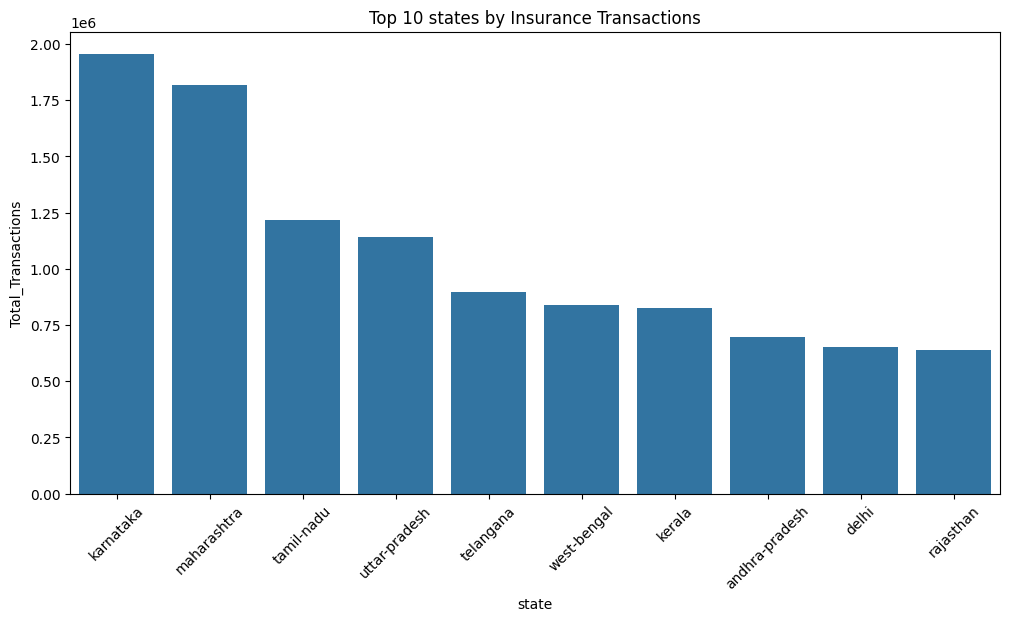

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))
top_states = insurance_by_state.sort_values('Total_Transactions', ascending=False).head(10)
sns.barplot(x='state', y='Total_Transactions', data=top_states)
plt.title('Top 10 states by Insurance Transactions')
plt.xticks(rotation=45)
plt.show()

In [53]:
#Total Registered Users and App Opens by State
query = """
SELECT state, SUM(registered_user) AS Total_Users,
       SUM(app_opens) AS Total_App_Opens
FROM map_users
GROUP BY state
ORDER BY Total_Users DESC;
"""

state_engagement = pd.read_sql_query(query, conn)
state_engagement['Engagement_Rate'] = state_engagement['Total_App_Opens'] / state_engagement['Total_Users']
state_engagement.head()

,state,Total_Users,Total_App_Opens,Engagement_Rate
0,maharashtra,1140138243,4.961642e+10,43.517902
1,uttar-pradesh,942334146,3.323683e+10,35.270752
2,karnataka,733674236,3.834488e+10,52.264176
3,andhra-pradesh,556747126,2.472802e+10,44.415181
4,rajasthan,555774493,4.850763e+10,87.279339


In [54]:
# Districts with Highest Engagement (App Opens per User)
query = """
SELECT State, District,
       SUM(Registered_user) AS Users,
       SUM(app_opens) AS Opens
FROM map_users
GROUP BY State, District
HAVING Users > 1000  -- filter out low-user districts
ORDER BY Opens * 1.0 / Users DESC
LIMIT 10;
"""

high_engagement_districts = pd.read_sql_query(query, conn)
high_engagement_districts['Engagement_Rate'] = high_engagement_districts['Opens'] / high_engagement_districts['Users']
high_engagement_districts.head()

,state,district,Users,Opens,Engagement_Rate
0,meghalaya,south west khasi hills district,51111,91138953.0,1783.157305
1,arunachal-pradesh,pakke kessang district,22810,36494368.0,1599.928452
2,nagaland,noklak district,5447,8410530.0,1544.066459
3,meghalaya,eastern west khasi hills district,8907,13159349.0,1477.416526
4,arunachal-pradesh,shi yomi district,16753,19056063.0,1137.471677


In [55]:
# Districts with Low Engagement but High Users (Opportunity Zones)
query = """
SELECT State, District,
       SUM(registered_user) AS Users,
       SUM(app_opens) AS Opens
FROM map_users
GROUP BY State, District
HAVING Users > 1000  -- filter out low-user districts
ORDER BY Opens * 1.0 / Users ASC
LIMIT 10;
"""

low_engagement_high_users = pd.read_sql_query(query, conn)
low_engagement_high_users['Engagement_Rate'] = low_engagement_high_users['Opens'] / low_engagement_high_users['Users']
low_engagement_high_users.head()

,state,district,Users,Opens,Engagement_Rate
0,chandigarh,chandigarh district,12855589,172230820.0,13.397350
1,uttar-pradesh,varanasi district,33686695,457176962.0,13.571440
2,maharashtra,mumbai district,44190076,605890537.0,13.711009
3,delhi,south east delhi district,34594607,477573836.0,13.804864
4,west-bengal,kolkata district,56032093,773975431.0,13.813074


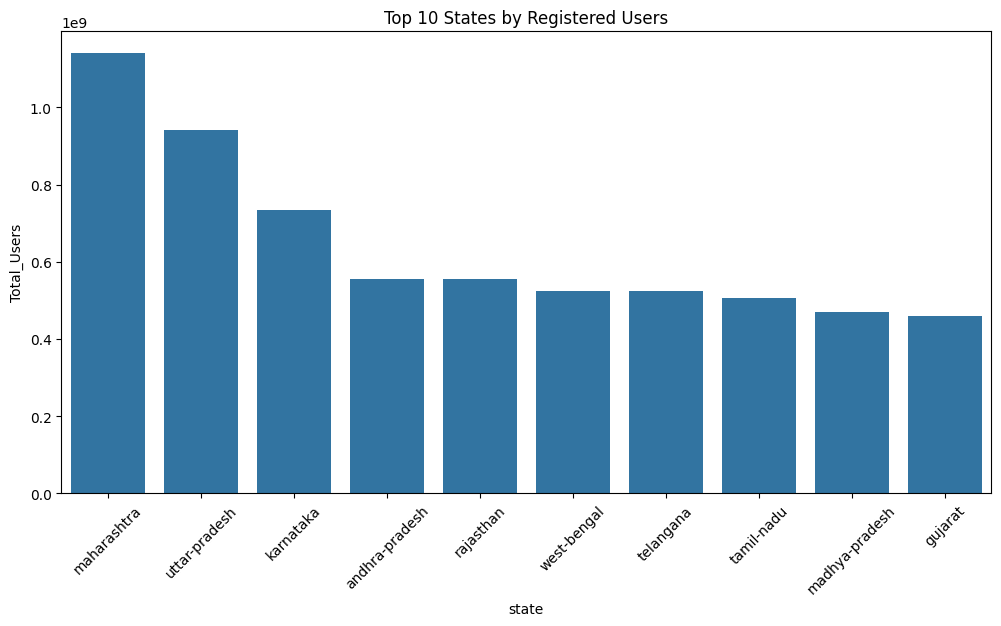

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))
top_states = state_engagement.sort_values('Total_Users', ascending=False).head(10)
sns.barplot(x='state', y='Total_Users', data=top_states)
plt.xticks(rotation=45)
plt.title('Top 10 States by Registered Users')
plt.show()

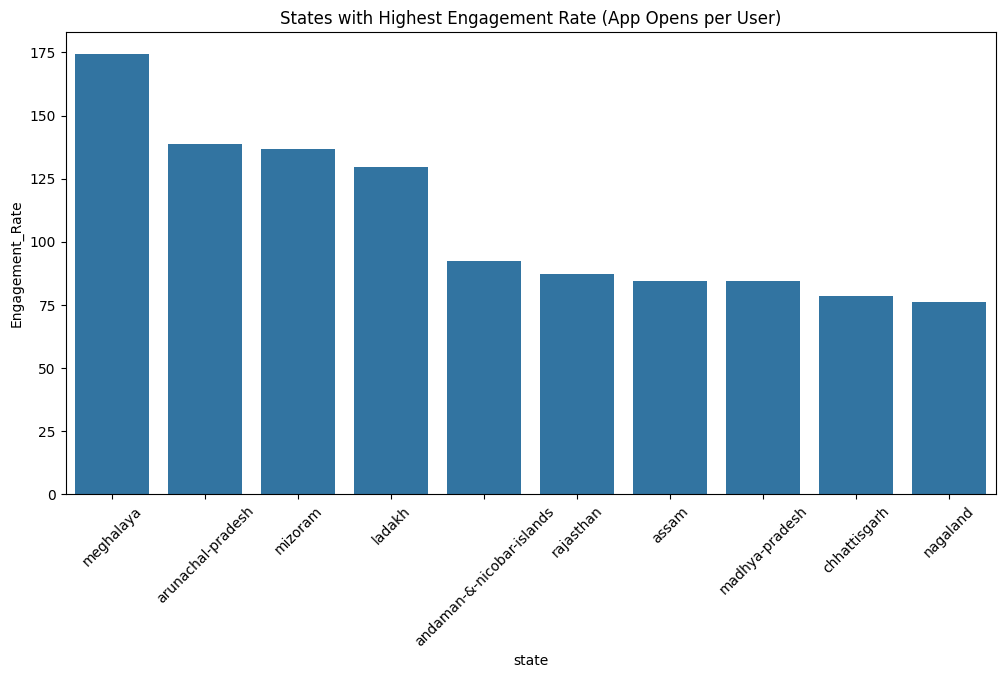

In [57]:
plt.figure(figsize=(12,6))
top_engagement = state_engagement.sort_values('Engagement_Rate', ascending=False).head(10)
sns.barplot(x='state', y='Engagement_Rate', data=top_engagement)
plt.xticks(rotation=45)
plt.title('States with Highest Engagement Rate (App Opens per User)')
plt.show()

# **3.Transaction Analysis for Market Expansion**


In [58]:
# Total Transactions by State (All Time)
query = """
SELECT State, SUM(Transaction_count) AS Total_Transactions,
       SUM(Transaction_amount) AS Total_Amount
FROM aggregated_transactions
GROUP BY State
ORDER BY Total_Transactions DESC;
"""

total_transactions_by_state = pd.read_sql_query(query, conn)
total_transactions_by_state.head()

,state,Total_Transactions,Total_Amount
0,maharashtra,31985208732,4.037420e+13
1,karnataka,30970946279,4.067872e+13
2,telangana,26174684592,4.165596e+13
3,andhra-pradesh,18918696723,3.466908e+13
4,uttar-pradesh,18523603727,2.688521e+13


In [59]:
# Underpenetrated but High Growth States
query = """
SELECT State, SUM(Transaction_count) AS Total_Transactions
FROM aggregated_transactions
GROUP BY State
ORDER BY Total_Transactions DESC
LIMIT 05;
"""

high_growth_states = pd.read_sql_query(query, conn)
high_growth_states

,state,Total_Transactions
0,maharashtra,31985208732
1,karnataka,30970946279
2,telangana,26174684592
3,andhra-pradesh,18918696723
4,uttar-pradesh,18523603727


## **4.User Engagement and Growth Strategy**

In [60]:
# User Engagement by State
query = """
SELECT State, SUM(registered_user) AS Total_Users,
       SUM(app_opens) AS Total_App_Opens
FROM map_users
GROUP BY State
ORDER BY Total_Users DESC;
"""

user_engagement = pd.read_sql_query(query, conn)
user_engagement.head()

,state,Total_Users,Total_App_Opens
0,maharashtra,1140138243,4.961642e+10
1,uttar-pradesh,942334146,3.323683e+10
2,karnataka,733674236,3.834488e+10
3,andhra-pradesh,556747126,2.472802e+10
4,rajasthan,555774493,4.850763e+10


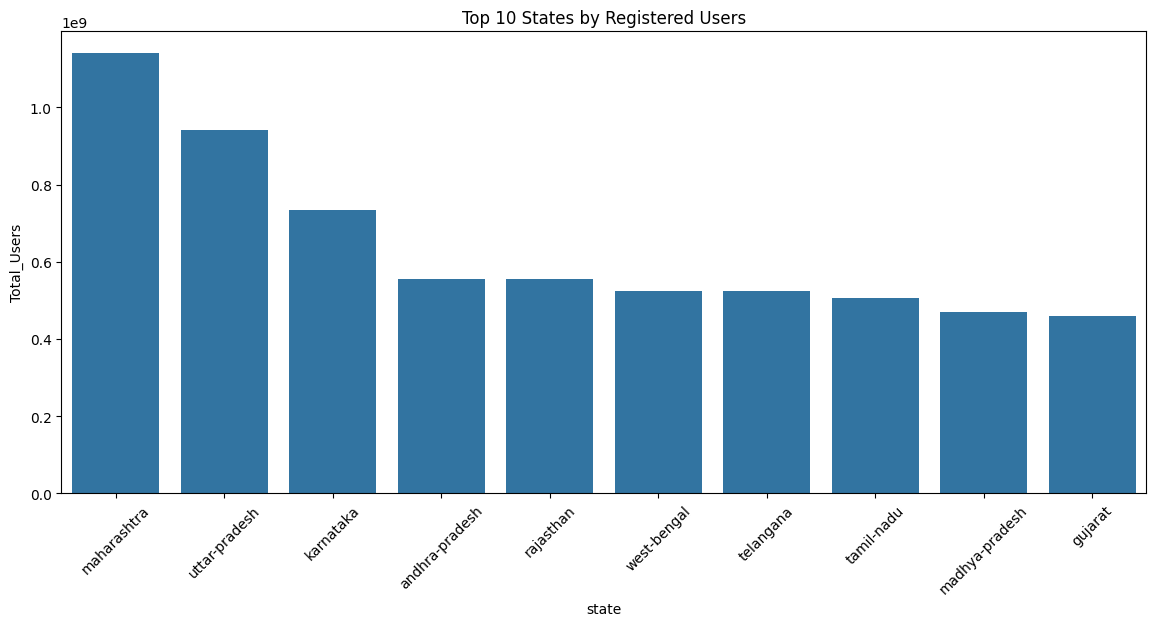

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(14, 6))
top_states= user_engagement.sort_values('Total_Users', ascending=False).head(10)
sns.barplot(x='state', y='Total_Users', data=top_states)
plt.xticks(rotation=45)
plt.title('Top 10 States by Registered Users')
plt.show()


In [62]:
# Top Districts by Engagement
query = """
SELECT state, district,
       SUM(registered_user) AS total_registered_users,
       SUM(app_opens) AS total_app_opens
FROM map_users
GROUP BY state, district
ORDER BY total_app_opens DESC
LIMIT 10;
"""
high_engagement_districts = pd.read_sql_query(query, conn)
high_engagement_districts.head()

,state,district,total_registered_users,total_app_opens
0,karnataka,bengaluru urban district,303663088,8.626629e+09
1,maharashtra,pune district,199346186,6.244893e+09
2,rajasthan,ganganagar district,11571144,4.524202e+09
3,rajasthan,barmer district,14138947,3.492608e+09
4,maharashtra,nashik district,62791515,3.388420e+09


### **5.User Registration Analysis**

In [63]:
# Analyze user registration trends over time
query = """
SELECT Year, Quarter, SUM(registered_user) AS Total_Users
FROM map_users
GROUP BY Year, Quarter
ORDER BY Year, Quarter;
"""

user_registration_trends = pd.read_sql_query(query, conn)
user_registration_trends.head()

,year,quarter,Total_Users
0,2018,1,46877653
1,2018,2,63648009
2,2018,3,80010589
3,2018,4,102261621
4,2019,1,123432188


In [64]:
# Identify user demographics or registration sources

query = """
SELECT State, SUM(registered_user) AS Total_Users,
       SUM(app_opens) AS Total_App_Opens
FROM map_users
GROUP BY State
ORDER BY Total_Users DESC;
"""

user_demographics = pd.read_sql_query(query, conn)
user_demographics.head()


,state,Total_Users,Total_App_Opens
0,maharashtra,1140138243,4.961642e+10
1,uttar-pradesh,942334146,3.323683e+10
2,karnataka,733674236,3.834488e+10
3,andhra-pradesh,556747126,2.472802e+10
4,rajasthan,555774493,4.850763e+10


In [65]:
# Detect registration issues (e.g., drop-offs or errors)
query = """
SELECT State, SUM(registered_user) AS Total_Users,
       SUM(app_opens) AS Total_App_Opens
FROM map_users
GROUP BY State
ORDER BY Total_Users DESC;
"""

registration_issues = pd.read_sql_query(query, conn)
registration_issues.head()


,state,Total_Users,Total_App_Opens
0,maharashtra,1140138243,4.961642e+10
1,uttar-pradesh,942334146,3.323683e+10
2,karnataka,733674236,3.834488e+10
3,andhra-pradesh,556747126,2.472802e+10
4,rajasthan,555774493,4.850763e+10


In [66]:
# Comparing app opens vs registrations
query = """
SELECT
  year,
  quarter,
  state,
  SUM(app_opens) AS total_app_opens,
  SUM(registered_user) AS total_registrations,
  ROUND(CAST(SUM(registered_user) AS FLOAT) / SUM(app_opens) * 100, 2) AS registration_conversion_rate
FROM map_users
GROUP BY year, quarter, state
ORDER BY year, quarter, state;
"""

df_conversion = pd.read_sql_query(query, conn)
df_conversion.head()


,year,quarter,state,total_app_opens,total_registrations,registration_conversion_rate
0,2018,1,andaman-&-nicobar-islands,0.0,6740,NaN
1,2018,1,andhra-pradesh,0.0,3336450,NaN
2,2018,1,arunachal-pradesh,0.0,21495,NaN
3,2018,1,assam,0.0,385237,NaN
4,2018,1,bihar,0.0,2133804,NaN


In [67]:
query = """
SELECT
  year,
  quarter,
  state,
  SUM(app_opens) AS total_app_opens,
  SUM(registered_user) AS total_registrations,
  CASE
    WHEN SUM(app_opens) = 0 THEN NULL
    ELSE ROUND(CAST(SUM(registered_user) AS FLOAT) / SUM(app_opens) * 100, 2)
  END AS registration_conversion_rate
FROM map_users
GROUP BY year, quarter, state
ORDER BY year, quarter, state;
"""

df_conversion = pd.read_sql_query(query, conn)
df_conversion.head()

,year,quarter,state,total_app_opens,total_registrations,registration_conversion_rate
0,2018,1,andaman-&-nicobar-islands,0.0,6740,NaN
1,2018,1,andhra-pradesh,0.0,3336450,NaN
2,2018,1,arunachal-pradesh,0.0,21495,NaN
3,2018,1,assam,0.0,385237,NaN
4,2018,1,bihar,0.0,2133804,NaN


In [68]:
!pip install streamlit
!pip install pyngrok


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 60.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 77.5 MB/s eta 0:00:00


In [69]:
import sqlite3
import pandas as pd
conn = sqlite3.connect("phonepe.db")
tables = pd.read_sql_query("SELECT name FROM sqlite_master WHERE type='table';", conn)
print("Tables in phonepe.db:\n", tables)

Tables in phonepe.db:
                       name
0     aggregated_insurance
1          sqlite_sequence
2  aggregated_transactions
3         aggregated_users
4            map_insurance
5         map_transactions
6                map_users
7            top_insurance
8         top_transactions
9                top_users


In [70]:
import sqlite3
import pandas as pd
conn = sqlite3.connect("phonepe.db")
tables = [
    'aggregated_insurance',
    'aggregated_transactions',
    'aggregated_users',
    'map_insurance',
    'map_transactions',
    'map_users',
    'top_insurance',
    'top_transactions',
    'top_users'
]
for table in tables:
    df = pd.read_sql_query(f"SELECT * FROM {table}", conn)
    df.to_csv(f"{table}.csv", index=False)
    print(f"✅ Exported {table}.csv ({len(df)} rows)")


✅ Exported aggregated_insurance.csv (682 rows)
✅ Exported aggregated_transactions.csv (5034 rows)
✅ Exported aggregated_users.csv (6732 rows)
✅ Exported map_insurance.csv (13876 rows)
✅ Exported map_transactions.csv (20604 rows)
✅ Exported map_users.csv (20608 rows)
✅ Exported top_insurance.csv (5608 rows)
✅ Exported top_transactions.csv (8296 rows)
✅ Exported top_users.csv (8296 rows)


In [71]:
!pip install plotly

In [72]:
%%writefile app.py
import streamlit as st
import pandas as pd
import plotly.express as px
import requests

# Set Streamlit page config
st.set_page_config(page_title="PhonePe Pulse", layout="wide")

# Title and markdown
st.title("Welcome to PhonePe Pulse")
st.markdown("""
# Data Insights from PhonePe Pulse
""")

# Load data
agg_users = pd.read_csv("aggregated_users.csv")
agg_txns = pd.read_csv("aggregated_transactions.csv")
agg_insurance = pd.read_csv("aggregated_insurance.csv")

# Clean column names
agg_users.columns = agg_users.columns.str.strip().str.lower()
agg_txns.columns = agg_txns.columns.str.strip().str.lower()
agg_insurance.columns = agg_insurance.columns.str.strip().str.lower()

# Standardize state names
agg_users['state'] = agg_users['state'].str.title()
agg_txns['state'] = agg_txns['state'].str.title()
agg_insurance['state'] = agg_insurance['state'].str.title()

# Aggregate metrics by state
state_user = agg_users.groupby("state")['user_count'].sum().reset_index()
state_txns = agg_txns.groupby("state")['transaction_amount'].sum().reset_index()
state_insurance = agg_insurance.groupby("state")['transaction_amount'].sum().reset_index()

# Rename columns for clarity
state_txns.rename(columns={'transaction_amount': 'txn_amount'}, inplace=True)
state_insurance.rename(columns={'transaction_amount': 'ins_amount'}, inplace=True)

# Merge all data
merged_df = state_user.merge(state_txns, on="state", how="outer")
merged_df = merged_df.merge(state_insurance, on="state", how="outer")
merged_df.fillna(0, inplace=True)

# Load GeoJSON data
geojson_url = "https://raw.githubusercontent.com/geohacker/india/master/state/india_state.geojson"
try:
    response = requests.get(geojson_url)
    response.raise_for_status()
    geojson_data = response.json()
except (requests.exceptions.RequestException, ValueError) as e:
    st.error(f"Failed to load GeoJSON data: {e}")
    st.stop()

geo_states = [feature["properties"]["NAME_1"] for feature in geojson_data["features"]]

# State name corrections to match GeoJSON
name_corrections = {
    "Andaman-&-Nicobar-Islands": "Andaman and Nicobar",
    "Andhra-Pradesh": "Andhra Pradesh",
    "Arunachal-Pradesh": "Arunachal Pradesh",
    "Himachal-Pradesh": "Himachal Pradesh",
    "Jammu-&-Kashmir": "Jammu and Kashmir",
    "Madhya-Pradesh": "Madhya Pradesh",
    "Odisha": "Orissa",
    "Tamil-Nadu": "Tamil Nadu",
    "Telangana": "Andhra Pradesh",  # Handle based on GeoJSON absence
    "Uttar-Pradesh": "Uttar Pradesh",
    "Uttarakhand": "Uttaranchal",
    "West-Bengal": "West Bengal",
    "Dadra-&-Nagar-Haveli-&-Daman-&-Diu": "Dadra and Nagar Haveli",
    "Ladakh": "Jammu and Kashmir"
}

merged_df['state'] = merged_df['state'].replace(name_corrections)
merged_df = merged_df[merged_df['state'].isin(geo_states)]

# Sidebar metric selection
metric = st.sidebar.selectbox(
    "Choose Metric to Display on Map:",
    ["user_count", "txn_amount", "ins_amount"],
    format_func=lambda x: x.replace("_", " ").title()
)

# Create choropleth map
fig = px.choropleth(
    merged_df,
    geojson=geojson_data,
    featureidkey="properties.NAME_1",
    locations="state",
    color=metric,
    color_continuous_scale="reds",
    title=f"PhonePe {metric.replace('_', ' ').title()} by State"
)

fig.update_geos(fitbounds="locations", visible=False)
fig.update_layout(margin={"r": 0, "t": 20, "l": 0, "b": 0})

# Show the map
st.plotly_chart(fig, use_container_width=True)



Writing app.py


In [73]:
# 👇 Make sure the pages/ folder exists
import os
os.makedirs("pages", exist_ok=True)

In [74]:
%%writefile pages/Decoding_Transaction_Dynamics.py

import streamlit as st
import pandas as pd
import plotly.express as px
st.set_page_config(page_title="Transaction Dynamics", layout="wide")

st.title("Case Study 1 : Decoding Transaction Dynamics on PhonePe")
st.markdown("""
- Top states by transaction amount
- Transaction type trends
- States with declining transactions (Q4 vs Q1 of 2023)
""")
agg_txns = pd.read_csv("aggregated_transactions.csv")

#Top States by Transaction Amount
top_states = (
    agg_txns.groupby("state")["transaction_amount"]
    .sum()
    .reset_index()
    .sort_values(by="transaction_amount", ascending=False)
    .head(10)
)
fig1 = px.bar(
    top_states,
    x="state",
    y="transaction_amount",
    color="transaction_amount",
    color_continuous_scale="Purples",
    title="Top 10 States by Transaction Amount",
)
st.plotly_chart(fig1, use_container_width=True)

#Transaction Trends by Type
txn_trends = (
    agg_txns.groupby(["transaction_type", "year", "quarter"])
    .agg({"transaction_count": "sum", "transaction_amount": "sum"})
    .reset_index()
)
fig3 = px.bar(
    txn_trends,
    x="quarter",
    y="transaction_amount",
    color="transaction_type",
    barmode="group",
    facet_col="year",
    color_continuous_scale="Viridis",
    title="Transaction Trends by Type (Bar Chart)",
)
st.plotly_chart(fig3, use_container_width=True)

#States with Declining Transactions (Q4 vs Q1 2023)
latest_quarters = agg_txns[agg_txns["year"] == 2023]
latest_quarters = latest_quarters[latest_quarters["quarter"].isin([1, 4])]
decline = (
    latest_quarters.groupby(["state", "quarter"])["transaction_count"]
    .sum()
    .unstack()
    .reset_index()
)
decline = decline.rename(columns={1: "Q1_Transactions", 4: "Q4_Transactions"})
decline["Change"] = decline["Q4_Transactions"] - decline["Q1_Transactions"]
declining_states = decline[decline["Change"] < 0].sort_values(by="Change")

fig4 = px.bar(
    declining_states,
    x="state",
    y="Change",
    color="Change",
    color_continuous_scale="Reds",
    title="📉 States with Declining Transactions (Q4 vs Q1 – 2023)",
)
st.plotly_chart(fig4, use_container_width=True)


Writing pages/Decoding_Transaction_Dynamics.py


In [85]:
%%writefile pages/Insurance_Insights.py

import streamlit as st
import pandas as pd
import plotly.express as px
st.set_page_config(page_title="Insurance Penetration and Growth Analysis", layout="wide")
st.title("Case Study 2 : Insurance Penetration and Growth Analysis on PhonePe")
st.markdown("""
- Total Insurance Transactions by State
- Quarterly Growth in Insurance Transactions by State
""")
agg_ins = pd.read_csv("aggregated_insurance.csv")

# Total Insurance by State
insurance_by_state = (
    agg_ins.groupby("state")[["transaction_count", "transaction_amount"]]
    .sum()
    .reset_index()
    .sort_values(by="transaction_count", ascending=False)
)

fig1 = px.bar(
    insurance_by_state,
    x="state",
    y="transaction_count",
    color="transaction_amount",
    color_continuous_scale="Purples",
    title="Total Insurance Transactions by State (All-Time)"
)
st.plotly_chart(fig1, use_container_width=True)

# Quarterly Growth by State

insurance_growth = (
    agg_ins.groupby(["state", "year", "quarter"])["transaction_count"]
    .sum()
    .reset_index()
    .sort_values(by=["state", "year", "quarter"])
)
insurance_growth['Prev'] = insurance_growth.groupby('state')['transaction_count'].shift(1)
insurance_growth['Growth'] = insurance_growth['transaction_count'] - insurance_growth['Prev']
insurance_growth['Growth_%'] = (insurance_growth['Growth'] / insurance_growth['Prev']) * 100
insurance_growth.dropna(inplace=True)

fig2 = px.bar(
    insurance_growth,
    x="quarter",
    y="Growth_%",
    color="state",
    color_continuous_scale="Reds",
    title="📈 Quarterly Growth in Insurance Transactions by State")

st.plotly_chart(fig2, use_container_width=True)

Overwriting pages/Insurance_Insights.py


In [76]:
%%writefile pages/Transaction_Analysis.py

import streamlit as st
import pandas as pd
import plotly.express as px
st.set_page_config(page_title="Transaction Analysis for Market Expansion", layout="wide")
st.title("Case Study 3: Transaction Analysis for Market Expansion")
st.markdown("""
This page explores:
- Top Performing States by transaction volume
- Underpenetrated but High-Growth States
""")

agg_txns = pd.read_csv("aggregated_transactions.csv")

# Total Transactions by State (All-Time)
st.header("Total Transactions by State (All-Time)")
total_txns_state = (
    agg_txns.groupby("state")[["transaction_count", "transaction_amount"]]
    .sum()
    .reset_index()
    .sort_values(by="transaction_count", ascending=False)
)

fig1 = px.bar(
    total_txns_state,
    x="state",
    y="transaction_count",
    color="transaction_amount",
    color_continuous_scale="Tealgrn",
    title="Top States by Total Transactions",
)
st.plotly_chart(fig1, use_container_width=True)

# Underpenetrated but High-Growth States
st.header("Underpenetrated but High-Growth States")
growth_df = agg_txns[agg_txns["year"] == 2023]
growth_df = growth_df.groupby(["state", "quarter"])["transaction_count"].sum().unstack().fillna(0)
if 1 in growth_df.columns and 4 in growth_df.columns:
    growth_df["Growth_%"] = ((growth_df[4] - growth_df[1]) / growth_df[1]) * 100
    growth_df = growth_df.reset_index().sort_values(by="Growth_%", ascending=False)
else:
    growth_df["Growth_%"] = 0

median_volume = total_txns_state["transaction_count"].median()
high_growth_states = growth_df.merge(total_txns_state, on="state", how="left")
underpenetrated = high_growth_states[
    (high_growth_states["transaction_count"] < median_volume) &
    (high_growth_states["Growth_%"] > 0)
].sort_values(by="Growth_%", ascending=False).head(10)

fig2 = px.bar(
    underpenetrated,
    x="state",
    y="Growth_%",
    color="Growth_%",
    color_continuous_scale="Viridis",
    title="Top 10 Underpenetrated but High-Growth States (Q4 vs Q1, 2023)"
)
st.plotly_chart(fig2, use_container_width=True)

Writing pages/Transaction_Analysis.py


In [77]:
%%writefile pages/User_Engagement_and_Growth_Strategy.py
import streamlit as st
import pandas as pd
import plotly.express as px
st.set_page_config(page_title="User Engagement and Growth Strategy", layout="wide")
st.title("User Engagement and Growth Strategy")
st.markdown("""
This section analyzes:
- User engagement by state
- Top districts by app opens
- Growth opportunities in user acquisition
""")
map_users = pd.read_csv("map_users.csv")

#User Engagement by State
st.header("User Engagement by State")

user_engagement = (
    map_users.groupby("state")[["registered_user", "app_opens"]]
    .sum()
    .reset_index()
    .sort_values(by="registered_user", ascending=False)
)

fig1 = px.bar(
    user_engagement,
    x="state",
    y="registered_user",
    color="app_opens",
    color_continuous_scale="Blues",
    title="Total Users vs App Opens by State"
)
st.plotly_chart(fig1, use_container_width=True)

#Top Districts by Engagement
st.header("Top Districts by Engagement")

top_districts = (
    map_users.groupby(["state", "district"])[["registered_user", "app_opens"]]
    .sum()
    .reset_index()
    .sort_values(by="app_opens", ascending=False)
    .head(10)
)

fig2 = px.bar(
    top_districts,
    x="district",
    y="app_opens",
    color="state",
    text="registered_user",
    title="Top 10 Districts by App Opens",
)
fig2.update_traces(texttemplate="%{text}", textposition="outside")
st.plotly_chart(fig2, use_container_width=True)

# 🧭 Identify Growth Potential States (High Opens, Low Users)
st.header("Growth Potential States")

median_users = user_engagement["registered_user"].median()
median_opens = user_engagement["app_opens"].median()

growth_opportunity = user_engagement[
    (user_engagement["registered_user"] < median_users) &
    (user_engagement["app_opens"] > median_opens)
].sort_values(by="app_opens", ascending=False)

st.dataframe(growth_opportunity, use_container_width=True)
st.caption("These states show strong engagement (app opens) but lower user base — potential focus areas for user acquisition campaigns.")


Writing pages/User_Engagement_and_Growth_Strategy.py


In [84]:
%%writefile pages/User_Registration_Analysis.py
import streamlit as st
import pandas as pd
import plotly.express as px
st.set_page_config(page_title="User Registration Analysis", layout="wide")
st.title("User Registration Analysis")
st.markdown("""
This analysis focuses on:
- User registration trends over time
- User demographics across states
- Key insights for regional growth strategy
""")
map_users = pd.read_csv("map_users.csv")

# User Registration Trends Over Time
st.header("User Registration Trends Over Time")

user_trends = (
    map_users.groupby(["year", "quarter"])["registered_user"]
    .sum()
    .reset_index()
    .sort_values(by=["year", "quarter"])
)

fig1 = px.line(
    user_trends,
    x="quarter",
    y="registered_user",
    color="year",
    markers=True,
    title="User Registration Trends (Quarterly)",
)
st.plotly_chart(fig1, use_container_width=True)

# User Demographics by State
st.header("User Demographics by State")

user_demographics = (
    map_users.groupby("state")[["registered_user", "app_opens"]]
    .sum()
    .reset_index()
    .sort_values(by="registered_user", ascending=False)
)

fig2 = px.bar(
    user_demographics,
    x="state",
    y="registered_user",
    color="app_opens",
    color_continuous_scale="Magma",
    title="Total Registered Users by State (with App Opens)",
)
st.plotly_chart(fig2, use_container_width=True)

#Registration-to-Engagement Ratio
st.header("Registration-to-Engagement Ratio")

user_demographics["Engagement_Ratio"] = (
    user_demographics["app_opens"] / user_demographics["registered_user"]
).round(2)

fig3 = px.bar(
    user_demographics,
    x="state",
    y="Engagement_Ratio",
    color="Engagement_Ratio",
    color_continuous_scale="Plasma",
    title="Registration-to-Engagement Ratio by State",
)

st.plotly_chart(fig3, use_container_width=True)

st.dataframe(user_demographics.sort_values(by="Engagement_Ratio", ascending=False).head(10))
st.caption("Top states show strong engagement per registered user — ideal targets for deeper market penetration.")


Overwriting pages/User_Registration_Analysis.py


In [79]:
# 👇 Write the Dashboard page
%%writefile pages/Dashboard.py
import streamlit as st
import pandas as pd

st.set_page_config(page_title="Dashboard", layout="wide")
st.title(" PhonePe Pulse - Dashboard")

# Load data (files must be uploaded already)
map_users = pd.read_csv("map_users.csv")
map_txns = pd.read_csv("map_transactions.csv")
map_insurance = pd.read_csv("map_insurance.csv")
top_users = pd.read_csv("top_users.csv")
top_txns = pd.read_csv("top_transactions.csv")
top_insurance = pd.read_csv("top_insurance.csv")

states = sorted(map_users['state'].dropna().unique())
state = st.sidebar.selectbox("📍 Select State", states)

years = sorted(map_users['year'].dropna().unique())
year = st.sidebar.selectbox("📆 Select Year", years)

quarters = sorted(map_users['quarter'].dropna().unique())
quarter = st.sidebar.selectbox("🕓 Select Quarter", quarters)

# Users
st.header(" Users Overview")
users_filtered = map_users[
    (map_users['state'] == state) &
    (map_users['year'] == year) &
    (map_users['quarter'] == quarter)
]
st.dataframe(users_filtered[['district', 'registered_user', 'app_opens']].sort_values(by='registered_user', ascending=False))

# Transactions
st.header(" Transactions Overview")
txns_filtered = map_txns[
    (map_txns['state'] == state) &
    (map_txns['year'] == year) &
    (map_txns['quarter'] == quarter)
]
st.dataframe(txns_filtered[['district', 'transaction_count', 'transaction_amount']].sort_values(by='transaction_amount', ascending=False))

# Insurance
st.header(" Insurance Overview")
insurance_filtered = map_insurance[
    (map_insurance['state'] == state) &
    (map_insurance['year'] == year) &
    (map_insurance['quarter'] == quarter)
]
st.dataframe(insurance_filtered[['district', 'insurance_count', 'insurance_amount']].sort_values(by='insurance_amount', ascending=False))

# Top Districts
st.header(" Top Districts")
st.dataframe(top_users[top_users['state'] == state][['district', 'registered_user']].sort_values(by='registered_user', ascending=False).head(10))
st.dataframe(top_txns[top_txns['state'] == state][['district', 'transaction_amount']].sort_values(by='transaction_amount', ascending=False).head(10))
st.dataframe(top_insurance[top_insurance['state'] == state][['district', 'insurance_amount']].sort_values(by='insurance_amount', ascending=False).head(10))


Writing pages/Dashboard.py


In [86]:
!pip install -q streamlit pyngrok


In [87]:
!pkill streamlit
!pkill ngrok


In [88]:
from pyngrok import conf, ngrok
import threading
import os
conf.get_default().auth_token = "33W9IXceAroYV3mge5rdq67S1Mm_6yw6afTVymn9wUQ3pJsM3"
def run_streamlit():
    os.system("streamlit run app.py --server.port 8501 --server.enableCORS false")
thread = threading.Thread(target=run_streamlit)
thread.start()
public_url = ngrok.connect(8501)
print("✅ Streamlit is live at:", public_url)


✅ Streamlit is live at: NgrokTunnel: "https://nonpsychopathic-overbrilliant-aaden.ngrok-free.dev" -> "http://localhost:8501"
